In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
from pandas.plotting import andrews_curves
from statsmodels.nonparametric.smoothers_lowess import lowess
red_wine=pd.read_csv("winequality-red.csv",sep=";")
white_wine=pd.read_csv("winequality-white.csv",sep=";")
#Column renaming according to usual conventions
red_wine.columns=red_wine.columns.str.replace(" ","_")
white_wine.columns=white_wine.columns.str.replace(" ","_")
red_wine["type"]="red"
white_wine["type"]="white"
#Create a variable for total acidity, to compare against pH
red_wine["total_acid"]=(red_wine["fixed_acidity"]+red_wine["volatile_acidity"]+red_wine["citric_acid"])
white_wine["total_acid"]=white_wine["fixed_acidity"]+white_wine["volatile_acidity"]+white_wine["citric_acid"]

In [ ]:
red_wine["quality_label"] = red_wine["quality"].apply(lambda value: "low"
if value <= 5 else "medium"
if value <= 7 else "high")
white_wine["quality_label"]=white_wine["quality"].apply(lambda value: "low"
if value<=5 else "medium"
if value<=7 else "high")
red_wine["quality_label"]=pd.Categorical(red_wine["quality_label"],categories=["low","medium","high"])
white_wine["quality_label"]=pd.Categorical(white_wine["quality_label"],categories=["low","medium","high"])

In [ ]:
conr=red_wine[["residual_sugar","total_sulfur_dioxide","sulphates","alcohol","volatile_acidity","quality"]].describe().applymap("{:.2f}".format)
conw=white_wine[["residual_sugar","total_sulfur_dioxide","sulphates","alcohol","volatile_acidity","quality"]].describe().applymap("{:.2f}".format)
keys=["Red Whine Statistics","White Wine Statistics"]
wines_sum=pd.concat((conr,conw),axis=1, keys=keys)
del conr,conw,keys
wines_sum

In [54]:
#Heatmap for red wines
conr=red_wine.drop(["type","quality_label"],axis=1).corr()
conr.style.background_gradient(cmap="hot")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,total_acid
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.996384
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.204351
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.690438
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.124488
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.116675
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.153614
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.096276
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.675596
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.683484
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.181603


In [53]:
#Heatmap for white wines
conw=white_wine.drop(["type","quality_label"],axis=1).corr()
conw.style.background_gradient(cmap="hot")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,total_acid
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663,0.987179
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723,0.071571
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209,0.394143
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577,0.104737
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934,0.045530
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158,-0.045133
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737,0.113189
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123,0.275609
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427,-0.430651
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678,-0.011852


In [ ]:
wines=pd.concat([red_wine,white_wine])
wines=wines.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
fig= plt.subplots(figsize=(5,5),facecolor="darkgrey")
wines["type"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops={"alpha":0.5}, colors=["yellow","red"], title="Distribution of wines based on colour")

In [ ]:
tempr=pd.DataFrame(data={"quality_label":["low","medium","high"],"count":red_wine.value_counts(subset="quality_label")})
tempw=pd.DataFrame(data={"quality_label":["low","medium","high"],"count":white_wine.value_counts(subset="quality_label")})
#Normalized for better understanding due to the radically different dataframe sizes
fig, axes = plt.subplots(1,2, sharey=True, squeeze=True, facecolor="snow")
tempr["count"]=preprocessing.minmax_scale(tempr["count"], feature_range=(0.1, 1))
tempw["count"]=preprocessing.minmax_scale(tempw["count"], feature_range=(0.1, 1))
tempr["count"].plot(kind='bar',ax=axes[0],color=["dimgray"]); axes[0].set_title('Red'); axes[0].set_xlabel("Wine quality")
tempw["count"].plot(kind='bar',ax=axes[1],color=["dimgray"]); axes[1].set_title('White'); axes[1].set_xlabel("Wine quality")

In [30]:
#x,y will be the y-axis variables, z for x-axis, winetype is the type-specific dataframe and out takes boolean values for outliers
def boxplotter(x,y,z,winetype,out):
    fig, axes = plt.subplots(1,2, figsize=(10,6),facecolor="snow")
    if len(winetype)==1599:
        title="Red Wines"
    else:
        title="White Wines"
    temp=winetype[[z,x]]
    temp.boxplot(by=z, ax=axes[0],showfliers=out,notch=True,patch_artist=True,color="dimgray");axes[0].set_title(""); axes[0].set_xlabel(z); axes[0].set_ylabel(x)
    temp=winetype[[z,y]]
    temp.boxplot(by=z, ax=axes[1],showfliers=out,notch=True,patch_artist=True,color="dimgray");axes[1].set_title(""); axes[1].set_xlabel(z); axes[1].set_ylabel(y)
    fig.suptitle(title)

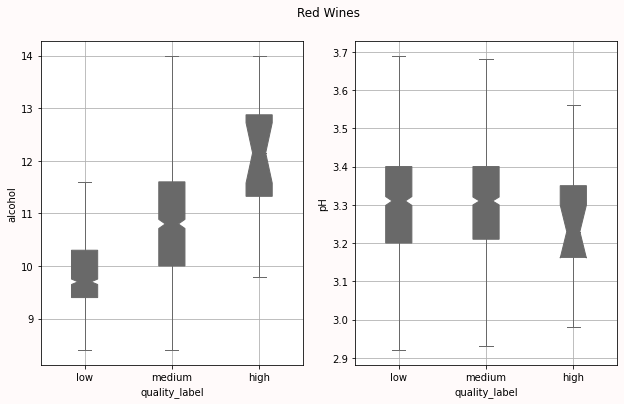

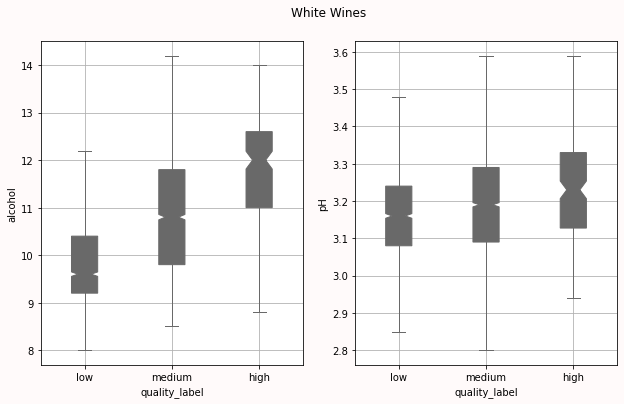

In [33]:
boxplotter("alcohol","pH","quality_label",red_wine,False)
boxplotter("alcohol","pH","quality_label",white_wine,False)

In [ ]:
#Takes a,b variables for x and y axis respectively.
def plotter(a,b):
    fig, axes = plt.subplots(1,2, figsize=(10,6),facecolor="snow")
    x=sns.regplot(ax=axes[0],x=red_wine[a],y=red_wine[b],lowess=True,scatter_kws={"color":"crimson"},line_kws={"color":"black"}).set(title="Red wines")
    y=sns.regplot(ax=axes[1],x=white_wine[a],y=white_wine[b],lowess=True,scatter_kws={"color":"crimson"},line_kws={"color":"black"}).set(title="White wines")
    return x,y

In [ ]:
plotter("total_acid","pH")
#The rate of change is much higher for red wines than white ones

In [ ]:
plotter("total_acid","quality")
plotter("fixed_acidity","quality")
plotter("volatile_acidity","quality")
plotter("citric_acid","quality")
#Comparing quality to different acidity indicators we see that white wines' acidity excepty citric are inversely correlated to quality
#Red wines are much more resilient to higher acidity values
#The reason is the presence of tanins in red wines hides/enhances the acidity, while their absence in white ones makes it more apparent
#Volatile acidity seems to be a special case, as it is the only acidity marker that is actively inversely propotional to quality on both wines

In [ ]:
plotter("chlorides","quality")
#As the quantity of chlorides increase, the quality decreases
#Not surprising considering chlorides are basically salts

In [ ]:
#With the removal of a single outlying value the effect of free SO2 in white wines becomes less pronounced,
#which is expected considering that there's no scentific literature to support a quality decrease because of them
plotter("free_sulfur_dioxide","quality")
#SO2 is antioxidant, and its presence in free form can help prevent oxidation and spoiling
#Red wines which are generally sotred longer than white ones benefit in quality with the presence of free SO2
#In white wines, which are not usually aged, the benefits of free SO2 are counteracted by general consumer attitudes towards S02,
#holding it responsible for hangovers.

In [ ]:
#We again remove the outlier, though even with it the results are the same, if a bit more extreme
plotter("total_sulfur_dioxide","quality")
#Total SO2 is directly correlated with free SO2 (naturally), but in high quantities, the bound SO2 can add
#unpleasant metallic and/or chemical taste to the wine. That much can be seen in the graphs

In [ ]:
plotter("alcohol","quality")
#Simply put, quality is directly related to alcoholic content, despite the fact that stronger wines are not recommended for food pairing
#since they dilute the taste
#It seems that costumers prefer more potent wines

In [ ]:
plotter("alcohol","density")
#The lower the density the higher the alcoholic value. Expected since alcohol has lower density than water

In [ ]:
plotter("density","quality")
#Higher densities lead to worse quality. To be expected since that means lower alcohol lead to worse quality

In [ ]:
plotter("total_acid","density")
#We see that more acidic red wines are denser. The effect is much less pronounced in white ones 